# Import and Install All Libraries

In [1]:
!pip3 install matplotlib
!pip3 install scikit-learn
!pip3 install datetime
!pip3 install utils
!pip3 install tensorflow
!pip3 install keras
!pip3 install keras-tuner


In [2]:
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from mpl_toolkits.mplot3d import Axes3D

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

2024-11-27 13:12:21.627592: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
!pip3 install yfinance
!pip3 install matplotlib
import yfinance as yf

# Isoaltion Forrest Method

In order to test how well we can detect anomalies we will use known Stock Market Anomalies to better understand if our ML Techniques are practical. On October 26, 2008 Volkswagen shares were "short squeezed" which is a term in the stock market where investors who bet against a stock are forced to buy out shares at the mercy of shareholders. This causes extreme volatility and typically a large increase in stock price in a short amount of time. We will try to predict 4 historic short squeezes using Volkswagen, Herbalife, Tesla, and Gamestop.

<Axes: xlabel='Date'>

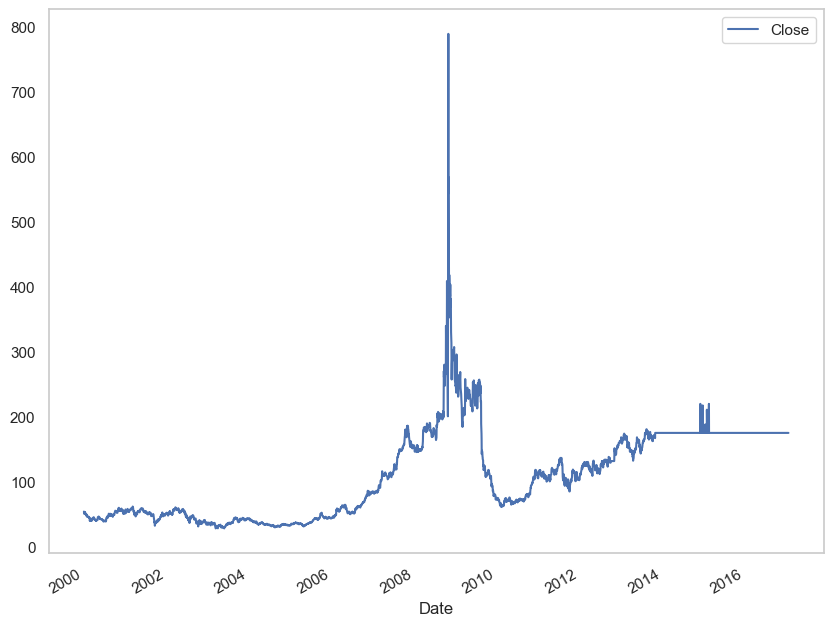

In [4]:
Volkswagen = yf.Ticker("VW")
Volkswagen = Volkswagen.history(period = "max")
Volkswagen.plot.line(y="Close", use_index=True)

In [5]:
Volkswagen

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00-05:00,54.375198,54.375198,54.375198,54.375198,0,0.0,0.0
2000-01-04 00:00:00-05:00,51.508202,51.508202,51.508202,51.508202,0,0.0,0.0
2000-01-05 00:00:00-05:00,51.261002,51.261002,51.261002,51.261002,0,0.0,0.0
2000-01-06 00:00:00-05:00,50.915001,50.915001,50.915001,50.915001,0,0.0,0.0
2000-01-07 00:00:00-05:00,52.200199,52.200199,52.200199,52.200199,0,0.0,0.0
...,...,...,...,...,...,...,...
2017-01-13 00:00:00-05:00,175.350006,175.350006,175.350006,175.350006,0,0.0,0.0
2017-01-17 00:00:00-05:00,175.350006,175.350006,175.350006,175.350006,0,0.0,0.0
2017-01-18 00:00:00-05:00,175.350006,175.350006,175.350006,175.350006,0,0.0,0.0


<Axes: xlabel='Date'>

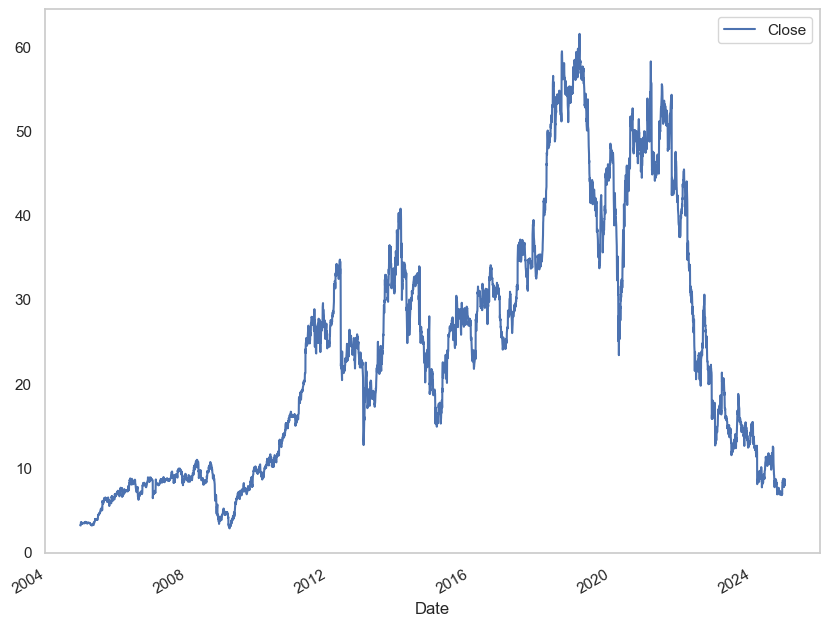

In [6]:
Herbalife = yf.Ticker("HLF")
Herbalife = Herbalife.history(period = "max")
Herbalife.plot.line(y="Close", use_index=True)

<Axes: xlabel='Date'>

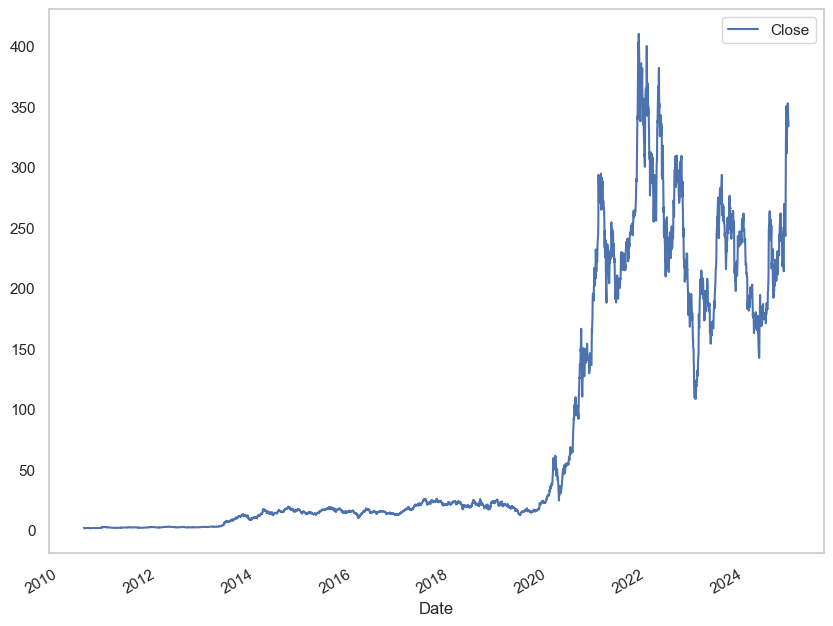

In [7]:
Tesla = yf.Ticker("TSLA")
Tesla = Tesla.history(period = "max")
Tesla.plot.line(y="Close", use_index=True)

<Axes: xlabel='Date'>

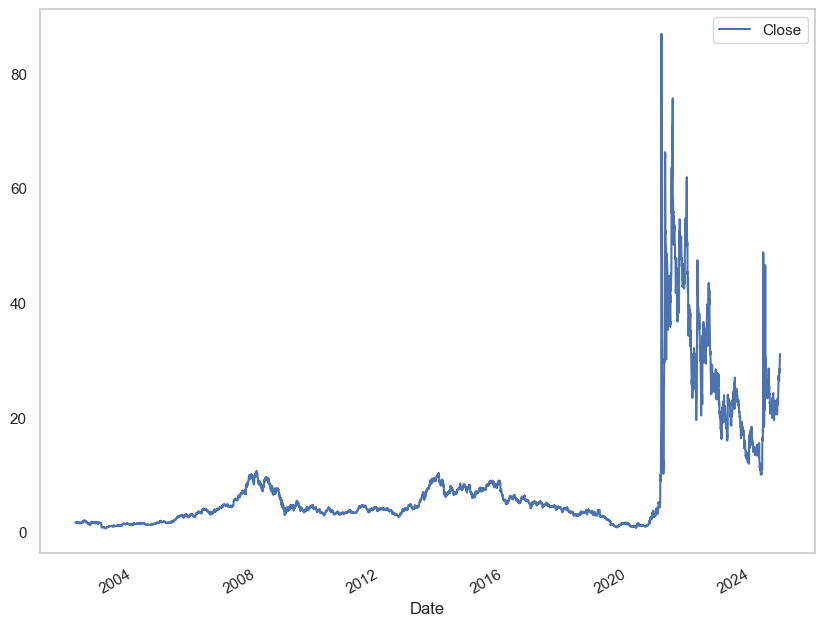

In [8]:
Gamestop = yf.Ticker("GME")
Gamestop = Gamestop.history(period = "max")
Gamestop.plot.line(y="Close", use_index=True)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [10]:
del Volkswagen["Dividends"]
del Volkswagen["Stock Splits"]
del Volkswagen["Open"]
del Volkswagen["High"]
del Volkswagen["Low"]
del Volkswagen["Volume"]
del Herbalife["Dividends"]
del Herbalife["Stock Splits"]
del Herbalife["Open"]
del Herbalife["High"]
del Herbalife["Low"]
del Herbalife["Volume"]
del Tesla["Dividends"]
del Tesla["Stock Splits"]
del Tesla["Open"]
del Tesla["High"]
del Tesla["Low"]
del Tesla["Volume"]
del Gamestop["Dividends"]
del Gamestop["Stock Splits"]
del Gamestop["Open"]
del Gamestop["High"]
del Gamestop["Low"]
del Gamestop["Volume"]

<Axes: xlabel='Date'>

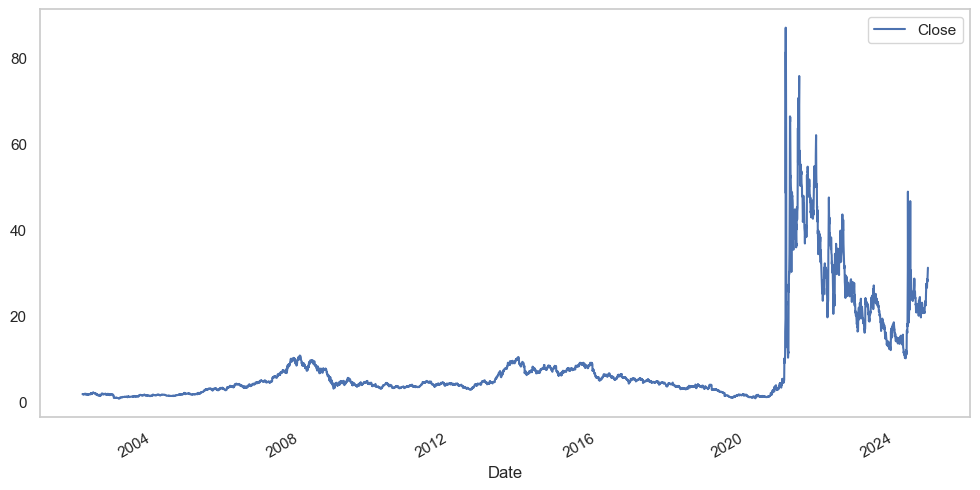

In [11]:
plt.rc('figure',figsize=(12,6))
plt.rc('font',size=15)
Gamestop.plot()

In [12]:
outliers_fraction = float(.01)

In [13]:
scaler = StandardScaler()
VW_np_scaled = scaler.fit_transform(Volkswagen.values.reshape(-1, 1))
VW_data = pd.DataFrame(VW_np_scaled)

HLF_np_scaled = scaler.fit_transform(Herbalife.values.reshape(-1, 1))
HLF_data = pd.DataFrame(HLF_np_scaled)

TSLA_np_scaled = scaler.fit_transform(Tesla.values.reshape(-1, 1))
TSLA_data = pd.DataFrame(TSLA_np_scaled)

GME_np_scaled = scaler.fit_transform(Gamestop.values.reshape(-1, 1))
GME_data = pd.DataFrame(GME_np_scaled)

In [14]:
# train isolation forest
VW_model =  IsolationForest(contamination=outliers_fraction)
VW_model.fit(VW_data) 

HLF_model =  IsolationForest(contamination=outliers_fraction)
HLF_model.fit(HLF_data) 

TSLA_model =  IsolationForest(contamination=outliers_fraction)
TSLA_model.fit(TSLA_data) 

GME_model =  IsolationForest(contamination=outliers_fraction)
GME_model.fit(GME_data) 

IsolationForest(contamination=0.01)

## Volkswagen Model

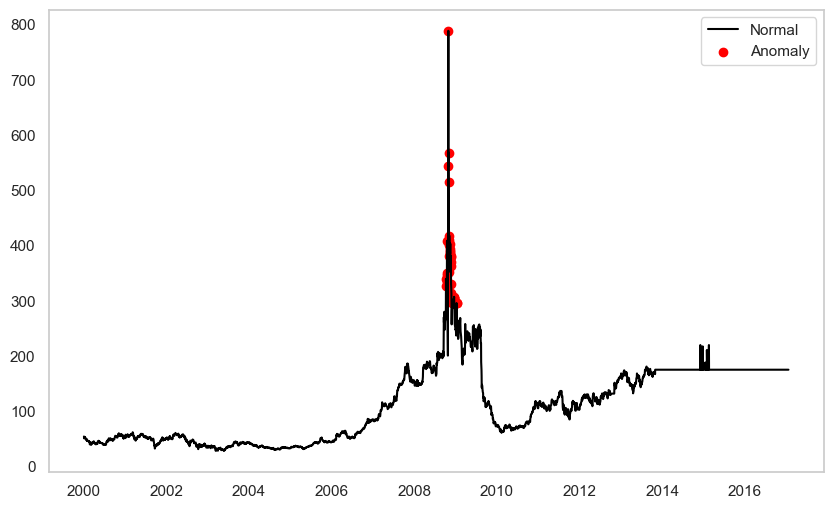

In [15]:
Volkswagen['anomaly'] = VW_model.predict(VW_data)

# visualization
fig, ax = plt.subplots(figsize=(10,6))

a = Volkswagen.loc[Volkswagen['anomaly'] == -1, ['Close']] #anomaly

ax.plot(Volkswagen.index, Volkswagen['Close'], color='black', label = 'Normal')
ax.scatter(a.index,a['Close'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

## Herbalife Model

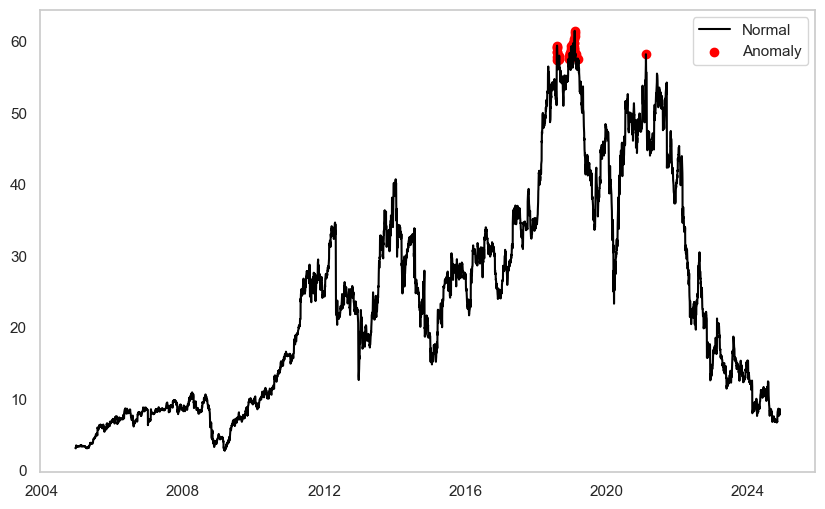

In [16]:
Herbalife['anomaly'] = HLF_model.predict(HLF_data)

# visualization
fig, ax = plt.subplots(figsize=(10,6))

a = Herbalife.loc[Herbalife['anomaly'] == -1, ['Close']] #anomaly

ax.plot(Herbalife.index, Herbalife['Close'], color='black', label = 'Normal')
ax.scatter(a.index,a['Close'], color='red', label = 'Anomaly')
plt.legend()
plt.show();


## Tesla Model

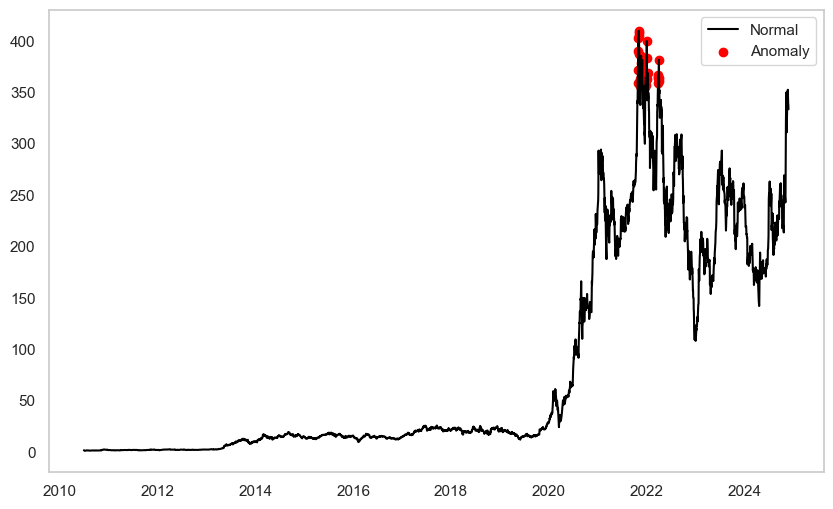

In [17]:
Tesla['anomaly'] = TSLA_model.predict(TSLA_data)

# visualization
fig, ax = plt.subplots(figsize=(10,6))

a = Tesla.loc[Tesla['anomaly'] == -1, ['Close']] #anomaly

ax.plot(Tesla.index, Tesla['Close'], color='black', label = 'Normal')
ax.scatter(a.index,a['Close'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

## Gamestop Model

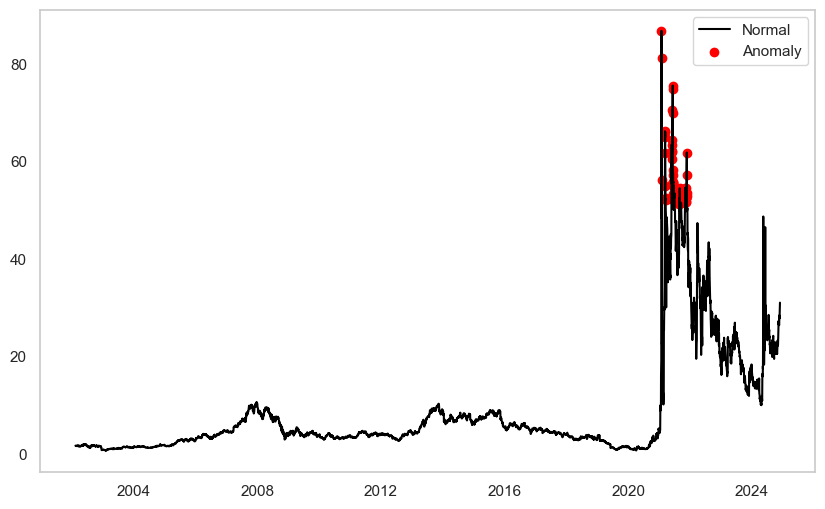

In [18]:
Gamestop['anomaly'] = GME_model.predict(GME_data)

# visualization
fig, ax = plt.subplots(figsize=(10,6))

a = Gamestop.loc[Gamestop['anomaly'] == -1, ['Close']] #anomaly

ax.plot(Gamestop.index, Gamestop['Close'], color='black', label = 'Normal')
ax.scatter(a.index,a['Close'], color='red', label = 'Anomaly')
plt.legend()
plt.show();


# K-Means Approach
This code was aided by the following blog post: https://neptune.ai/blog/anomaly-detection-in-time-series

In [19]:
from sklearn.cluster import KMeans

In [20]:
Volkswagen = yf.Ticker("VW")
Volkswagen = Volkswagen.history(start="2007-01-01", end="2009-12-31")
Herbalife = yf.Ticker("HLF")
Herbalife = Herbalife.history(start="2010-01-01", end="2013-12-31")
Tesla = yf.Ticker("TSLA")
Tesla = Tesla.history(start="2018-01-01", end="2021-12-31")
Gamestop = yf.Ticker("GME")
Gamestop = Gamestop.history(start="2019-01-01", end="2022-12-31")

Volkswagen['date_time'] = Volkswagen.index.to_pydatetime()
Herbalife['date_time'] = Herbalife.index.to_pydatetime()
Tesla['date_time'] = Tesla.index.to_pydatetime()
Gamestop['date_time'] = Gamestop.index.to_pydatetime()

In [21]:
del Volkswagen["Dividends"]
del Volkswagen["Stock Splits"]
del Volkswagen["Volume"]
del Volkswagen["High"]
del Volkswagen["Low"]
del Herbalife["Dividends"]
del Herbalife["Stock Splits"]
del Herbalife["Volume"]
del Herbalife["High"]
del Herbalife["Low"]
del Tesla["Dividends"]
del Tesla["Stock Splits"]
del Tesla["Volume"]
del Tesla["High"]
del Tesla["Low"]
del Gamestop["Dividends"]
del Gamestop["Stock Splits"]
del Gamestop["Volume"]
del Gamestop["High"]
del Gamestop["Low"]

In [22]:
Volkswagen["Tomorrow"] = Volkswagen["Close"].shift(-1)
Volkswagen["Target"] = (Volkswagen["Tomorrow"] > Volkswagen["Close"]).astype(int)


In [23]:
Herbalife["Tomorrow"] = Herbalife["Close"].shift(-1)
Herbalife["Target"] = (Herbalife["Tomorrow"] > Herbalife["Close"]).astype(int)

In [24]:
Tesla["Tomorrow"] = Tesla["Close"].shift(-1)
Tesla["Target"] = (Tesla["Tomorrow"] > Tesla["Close"]).astype(int)

In [25]:
Gamestop["Tomorrow"] = Gamestop["Close"].shift(-1)
Gamestop["Target"] = (Gamestop["Tomorrow"] > Gamestop["Close"]).astype(int)

## K-Means for Volkswagen

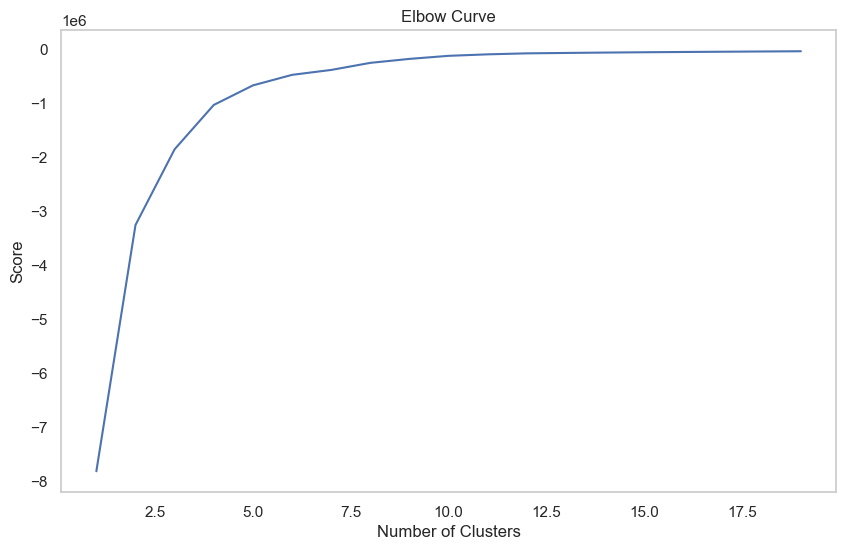

In [26]:
VW_data = Volkswagen[['Close', 'Open', 'Target']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(VW_data) for i in n_cluster]
scores = [kmeans[i].score(VW_data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

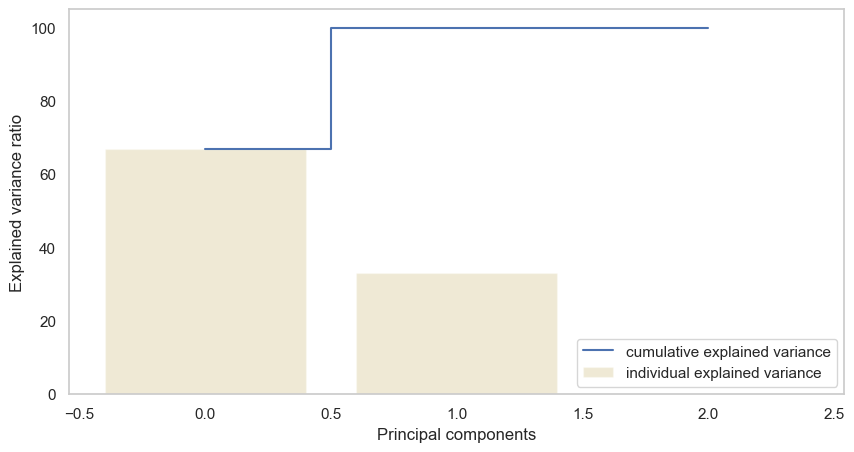

In [27]:
VW_data = Volkswagen[['Close', 'Open', 'Target']]
VW_X = VW_data.values
VW_X_std = StandardScaler().fit_transform(VW_X)
#Calculating Eigenvecors and eigenvalues of Covariance matrix
mean_vec = np.mean(VW_X_std, axis=0)
cov_mat = np.cov(VW_X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'y')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

In [28]:
VW_data = Volkswagen[['Close', 'Open', 'Target']]
VW_X_std = StandardScaler().fit_transform(VW_X)
VW_data = pd.DataFrame(VW_X_std)
pca = PCA(n_components=2)
VW_data = pca.fit_transform(VW_data)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(VW_data)
VW_data = pd.DataFrame(np_scaled)

In [29]:
kmeans = [KMeans(n_clusters=i).fit(VW_data) for i in n_cluster]
Volkswagen['cluster'] = kmeans[8].predict(VW_data)
Volkswagen.index = VW_data.index
Volkswagen['principal_feature1'] = VW_data[0]
Volkswagen['principal_feature2'] = VW_data[1]
Volkswagen['cluster'].value_counts()

cluster
1    143
6    123
5    109
4    101
0     98
2     89
8     23
3     13
7      4
Name: count, dtype: int64

In [30]:
kmeans[8]

KMeans(n_clusters=9)

In [31]:
# return Series of distance between each point and its distance with the closest centroid
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.at[i]=np.linalg.norm(Xa-Xb)
    return distance

outliers_fraction = 0.1
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(VW_data, kmeans[8])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
Volkswagen['anomaly1'] = (distance >= threshold).astype(int)

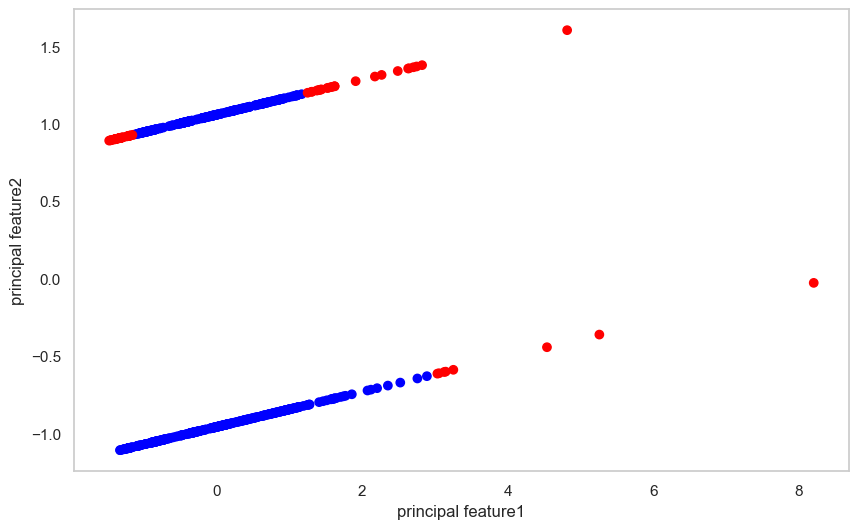

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(Volkswagen['principal_feature1'], Volkswagen['principal_feature2'], c=Volkswagen["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show();

In [33]:
print(Volkswagen.columns)



Index(['Open', 'Close', 'date_time', 'Tomorrow', 'Target', 'cluster', 'principal_feature1', 'principal_feature2', 'anomaly1'], dtype='object')


In [34]:
print(Volkswagen['date_time'].head())

0   2007-01-03 00:00:00-05:00
1   2007-01-04 00:00:00-05:00
2   2007-01-05 00:00:00-05:00
3   2007-01-08 00:00:00-05:00
4   2007-01-09 00:00:00-05:00
Name: date_time, dtype: datetime64[ns, America/New_York]


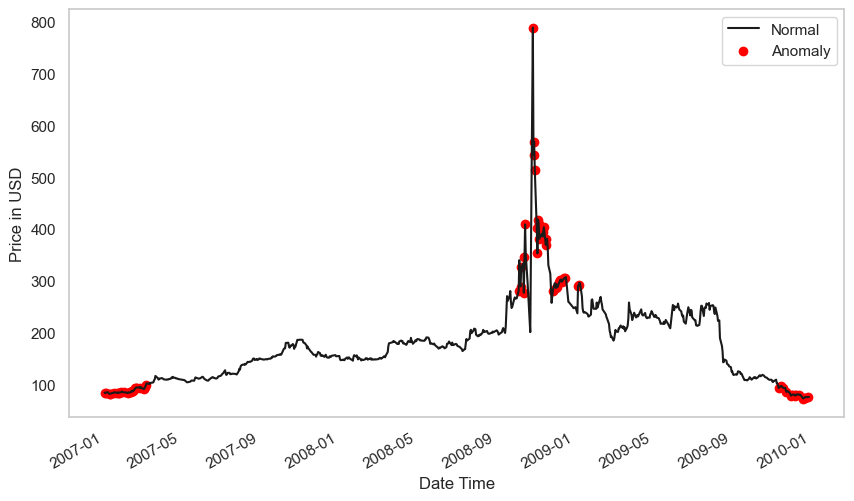

In [35]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Filter anomalies; assuming anomaly1 is a column in your DataFrame
a = Volkswagen.loc[Volkswagen['anomaly1'] == 1, ['date_time', 'Close']]  # Use 'Close' price or any other column

# Plot normal data using the 'date_time' column
ax.plot(Volkswagen['date_time'], Volkswagen['Close'], color='k', label='Normal')  # Replace 'Close' with your chosen price column

# Plot anomalies using the 'date_time' column
ax.scatter(a['date_time'], a['Close'], color='red', label='Anomaly')  # Adjust column name accordingly

# Format x-axis
ax.xaxis_date()
plt.xlabel('Date Time')
plt.ylabel('Price in USD')
plt.legend()
fig.autofmt_xdate()
plt.show()




## K-Means for Herbalife

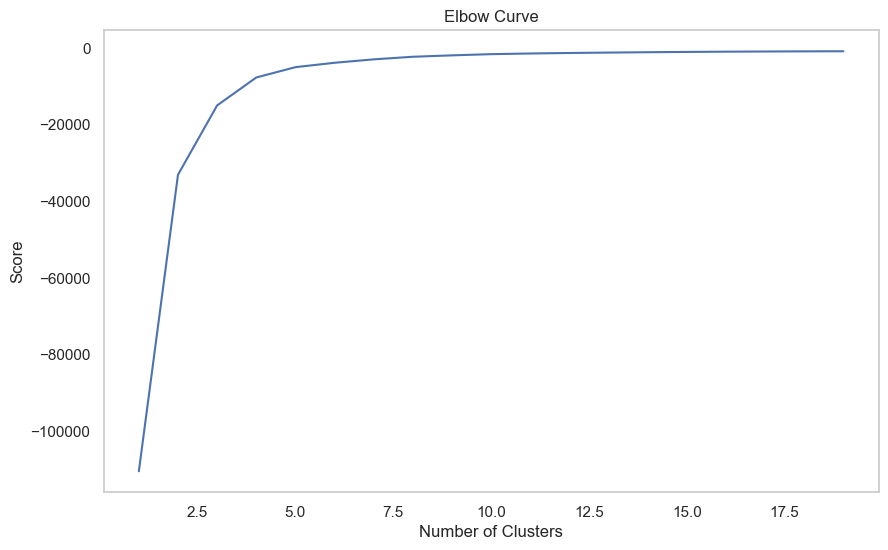

In [36]:
HLF_data = Herbalife[['Close', 'Open', 'Target']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(HLF_data) for i in n_cluster]
scores = [kmeans[i].score(HLF_data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

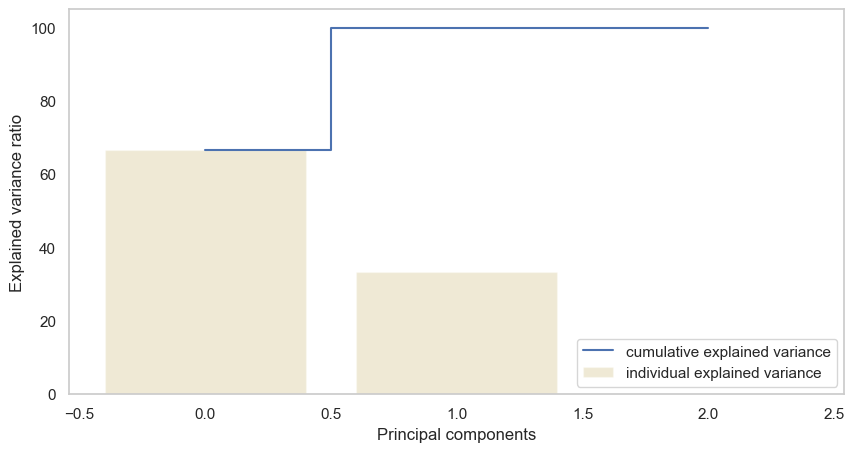

In [37]:
HLF_data = Herbalife[['Close', 'Open', 'Target']]
HLF_X = HLF_data.values
HLF_X_std = StandardScaler().fit_transform(HLF_X)
#Calculating Eigenvecors and eigenvalues of Covariance matrix
mean_vec = np.mean(HLF_X_std, axis=0)
cov_mat = np.cov(HLF_X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'y')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

In [38]:
# Take useful feature and standardize them
HLF_data = Herbalife[['Close', 'Open', 'Target']]
HLF_X_std = StandardScaler().fit_transform(HLF_X)
HLF_data = pd.DataFrame(HLF_X_std)
# reduce to 2 important features
pca = PCA(n_components=2)
HLF_data = pca.fit_transform(HLF_data)
# standardize these 2 new features
scaler = StandardScaler()
HLF_np_scaled = scaler.fit_transform(HLF_data)
HLF_data = pd.DataFrame(HLF_np_scaled)

In [39]:
kmeans = [KMeans(n_clusters=i).fit(HLF_data) for i in n_cluster]
Herbalife['cluster'] = kmeans[8].predict(HLF_data)
Herbalife.index = HLF_data.index
Herbalife['principal_feature1'] = HLF_data[0]
Herbalife['principal_feature2'] = HLF_data[1]
Herbalife['cluster'].value_counts()

cluster
1    202
0    137
2    112
6    105
8    102
3     98
7     90
4     80
5     79
Name: count, dtype: int64

In [40]:
kmeans[10]

KMeans(n_clusters=11)

In [41]:
# return Series of distance between each point and its distance with the closest centroid
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.at[i]=np.linalg.norm(Xa-Xb)
    return distance

outliers_fraction = 0.1
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(HLF_data, kmeans[8])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
Herbalife['anomaly1'] = (distance >= threshold).astype(int)

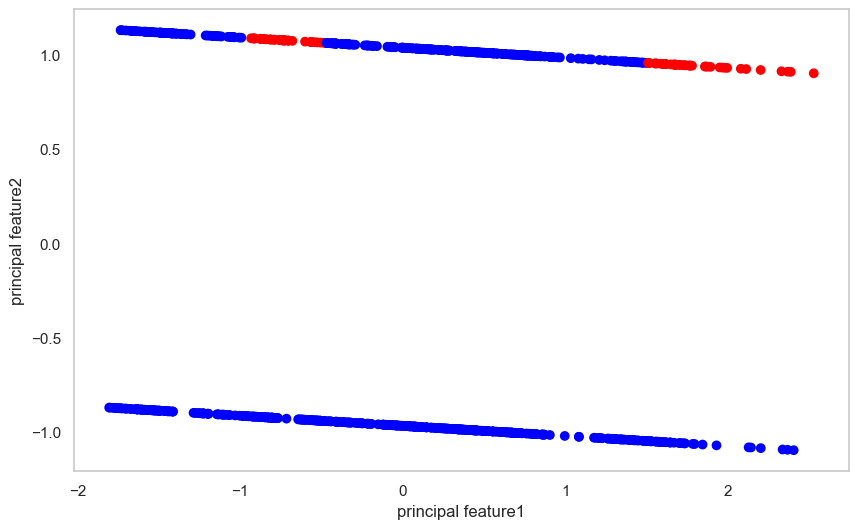

In [42]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(Herbalife['principal_feature1'], Herbalife['principal_feature2'], c=Herbalife["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show();

In [43]:
print(Herbalife.columns)



Index(['Open', 'Close', 'date_time', 'Tomorrow', 'Target', 'cluster', 'principal_feature1', 'principal_feature2', 'anomaly1'], dtype='object')


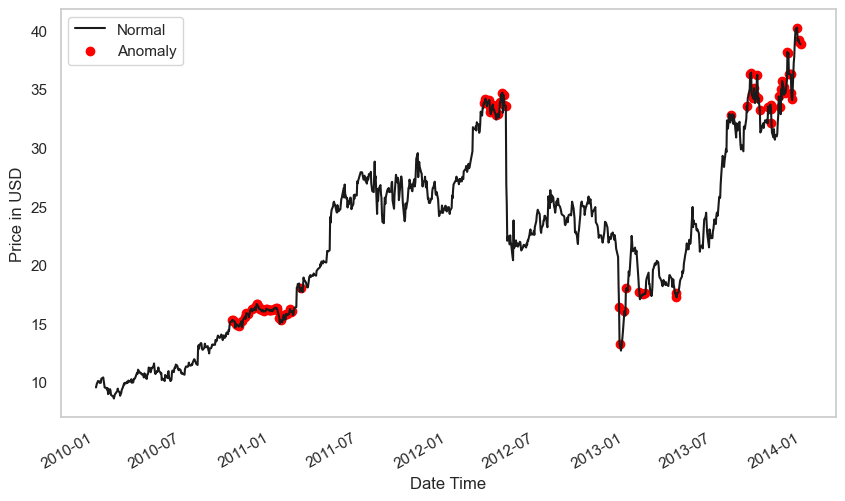

In [44]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Filter anomalies; assuming anomaly1 is a column in your DataFrame
a = Herbalife.loc[Herbalife['anomaly1'] == 1, ['date_time', 'Close']]  # Use 'Close' price or any other column

# Plot normal data using the 'date_time' column
ax.plot(Herbalife['date_time'], Herbalife['Close'], color='k', label='Normal')  # Replace 'Close' with your chosen price column

# Plot anomalies using the 'date_time' column
ax.scatter(a['date_time'], a['Close'], color='red', label='Anomaly')  # Adjust column name accordingly

# Format x-axis
ax.xaxis_date()
plt.xlabel('Date Time')
plt.ylabel('Price in USD')
plt.legend()
fig.autofmt_xdate()
plt.show()



## K-Means for Tesla

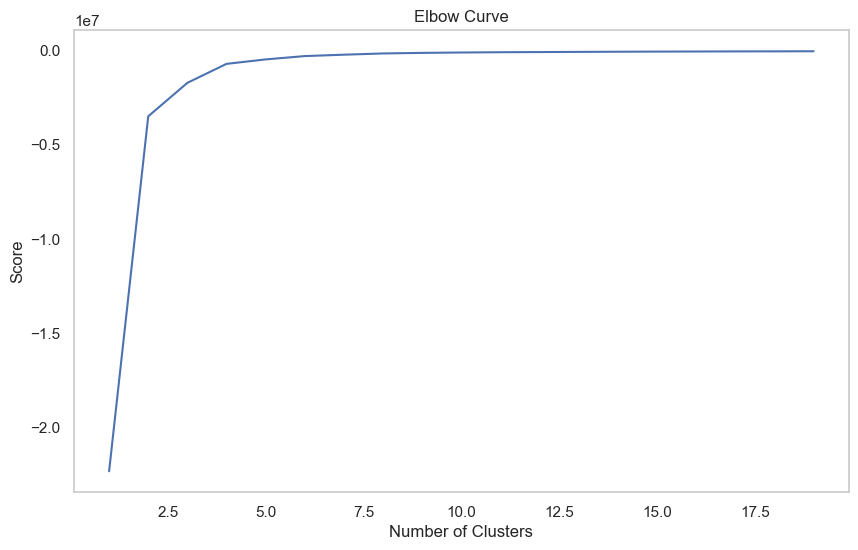

In [45]:
TSLA_data = Tesla[['Close', 'Open', 'Target']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(TSLA_data) for i in n_cluster]
scores = [kmeans[i].score(TSLA_data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

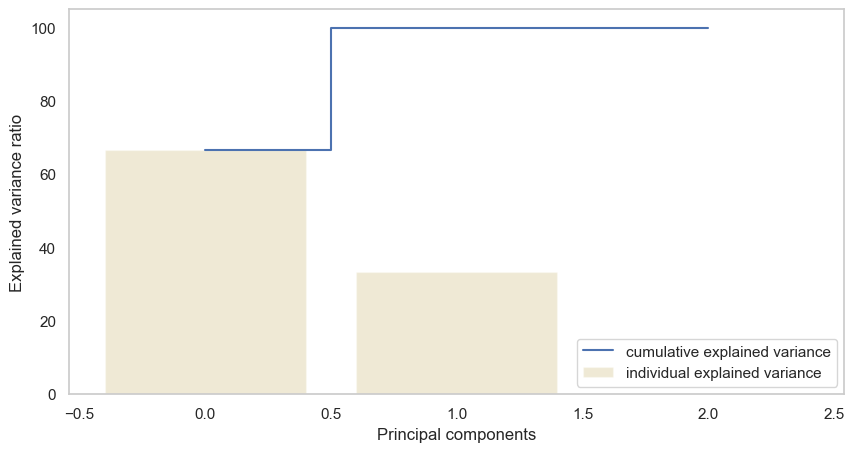

In [46]:
TSLA_data = Tesla[['Close', 'Open', 'Target']]
TSLA_X = TSLA_data.values
TSLA_X_std = StandardScaler().fit_transform(TSLA_X)
#Calculating Eigenvecors and eigenvalues of Covariance matrix
mean_vec = np.mean(TSLA_X_std, axis=0)
cov_mat = np.cov(TSLA_X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'y')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

In [47]:
# Take useful feature and standardize them
TSLA_data = Tesla[['Close', 'Open', 'Target']]
TSLA_X_std = StandardScaler().fit_transform(TSLA_X)
TSLA_data = pd.DataFrame(TSLA_X_std)
# reduce to 2 important features
pca = PCA(n_components=2)
TSLA_data = pca.fit_transform(TSLA_data)
# standardize these 2 new features
scaler = StandardScaler()
TSLA_np_scaled = scaler.fit_transform(TSLA_data)
TSLA_data = pd.DataFrame(TSLA_np_scaled)

In [48]:
kmeans = [KMeans(n_clusters=i).fit(TSLA_data) for i in n_cluster]
Tesla['cluster'] = kmeans[5].predict(TSLA_data)
Tesla.index = TSLA_data.index
Tesla['principal_feature1'] = TSLA_data[0]
Tesla['principal_feature2'] = TSLA_data[1]
Tesla['cluster'].value_counts()

cluster
0    322
1    320
2    148
3    119
5     63
4     35
Name: count, dtype: int64

In [49]:
kmeans[5]

KMeans(n_clusters=6)

In [50]:
# return Series of distance between each point and its distance with the closest centroid
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.at[i]=np.linalg.norm(Xa-Xb)
    return distance

outliers_fraction = 0.1
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(TSLA_data, kmeans[5])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
Tesla['anomaly1'] = (distance >= threshold).astype(int)

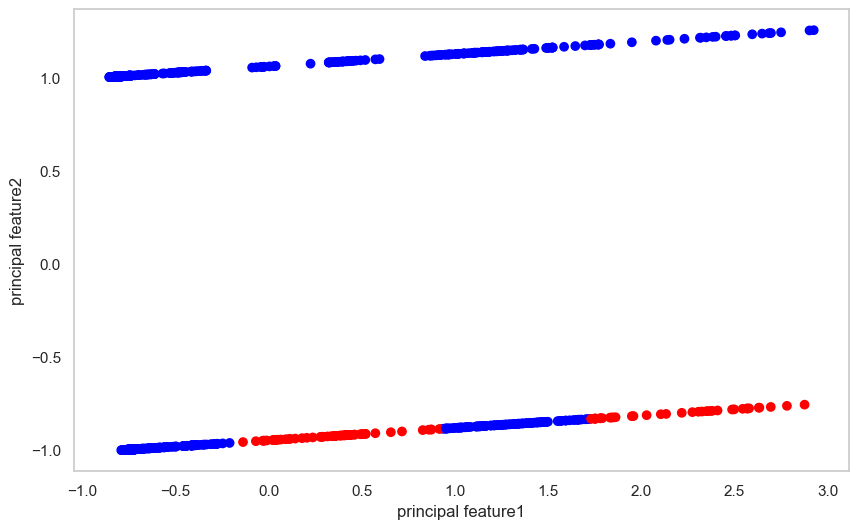

In [51]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(Tesla['principal_feature1'], Tesla['principal_feature2'], c=Tesla["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show();

In [52]:
print(Tesla.columns)



Index(['Open', 'Close', 'date_time', 'Tomorrow', 'Target', 'cluster', 'principal_feature1', 'principal_feature2', 'anomaly1'], dtype='object')


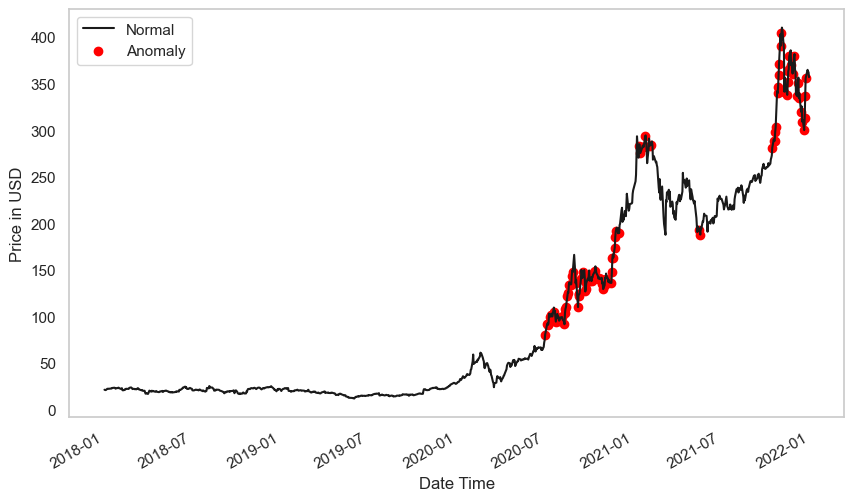

In [53]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Filter anomalies; assuming anomaly1 is a column in your DataFrame
a = Tesla.loc[Tesla['anomaly1'] == 1, ['date_time', 'Close']]  # Use 'Close' price or any other column

# Plot normal data using the 'date_time' column
ax.plot(Tesla['date_time'], Tesla['Close'], color='k', label='Normal')  # Replace 'Close' with your chosen price column

# Plot anomalies using the 'date_time' column
ax.scatter(a['date_time'], a['Close'], color='red', label='Anomaly')  # Adjust column name accordingly

# Format x-axis
ax.xaxis_date()
plt.xlabel('Date Time')
plt.ylabel('Price in USD')
plt.legend()
fig.autofmt_xdate()
plt.show()

## K-Means for Gamestop

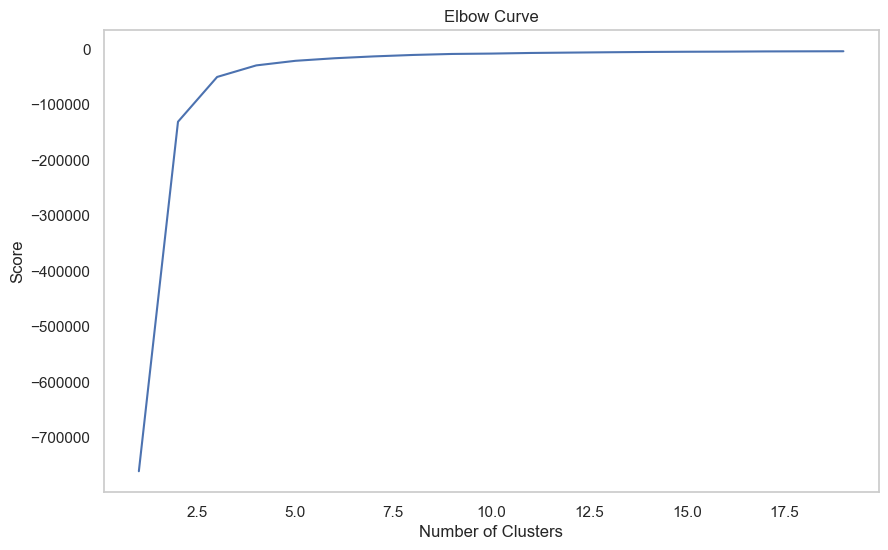

In [54]:
GME_data = Gamestop[['Close', 'Open', 'Target']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(GME_data) for i in n_cluster]
scores = [kmeans[i].score(GME_data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

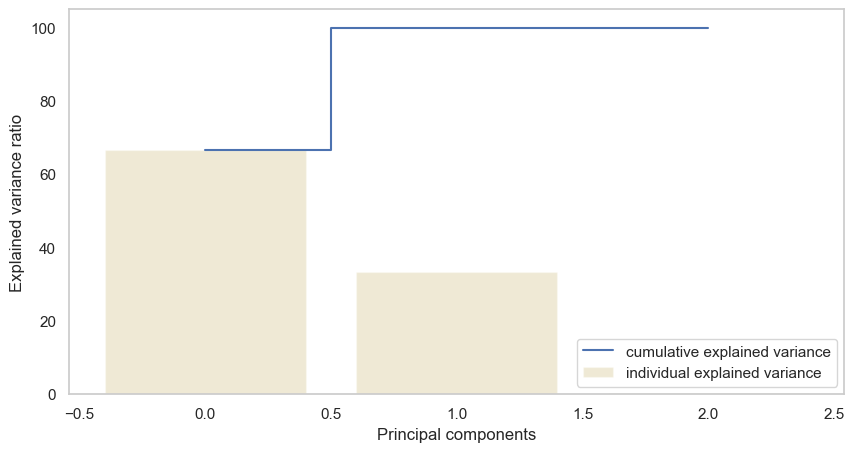

In [55]:
GME_data = Gamestop[['Close', 'Open', 'Target']]
GME_X = GME_data.values
GME_X_std = StandardScaler().fit_transform(GME_X)
#Calculating Eigenvecors and eigenvalues of Covariance matrix
mean_vec = np.mean(GME_X_std, axis=0)
cov_mat = np.cov(GME_X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'y')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

In [56]:
# Take useful feature and standardize them
GME_data = Gamestop[['Close', 'Open', 'Target']]
GME_X_std = StandardScaler().fit_transform(GME_X)
GME_data = pd.DataFrame(GME_X_std)
# reduce to 2 important features
pca = PCA(n_components=2)
GME_data = pca.fit_transform(GME_data)
# standardize these 2 new features
scaler = StandardScaler()
GME_np_scaled = scaler.fit_transform(GME_data)
GME_data = pd.DataFrame(GME_np_scaled)

In [57]:
kmeans = [KMeans(n_clusters=i).fit(GME_data) for i in n_cluster]
Gamestop['cluster'] = kmeans[5].predict(GME_data)
Gamestop.index = GME_data.index
Gamestop['principal_feature1'] = GME_data[0]
Gamestop['principal_feature2'] = GME_data[1]
Gamestop['cluster'].value_counts()

cluster
0    281
1    250
2    154
4    133
5     98
3     92
Name: count, dtype: int64

In [58]:
kmeans[5]

KMeans(n_clusters=6)

In [59]:
# return Series of distance between each point and its distance with the closest centroid
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.at[i]=np.linalg.norm(Xa-Xb)
    return distance

outliers_fraction = 0.1
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(GME_data, kmeans[5])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
Gamestop['anomaly1'] = (distance >= threshold).astype(int)

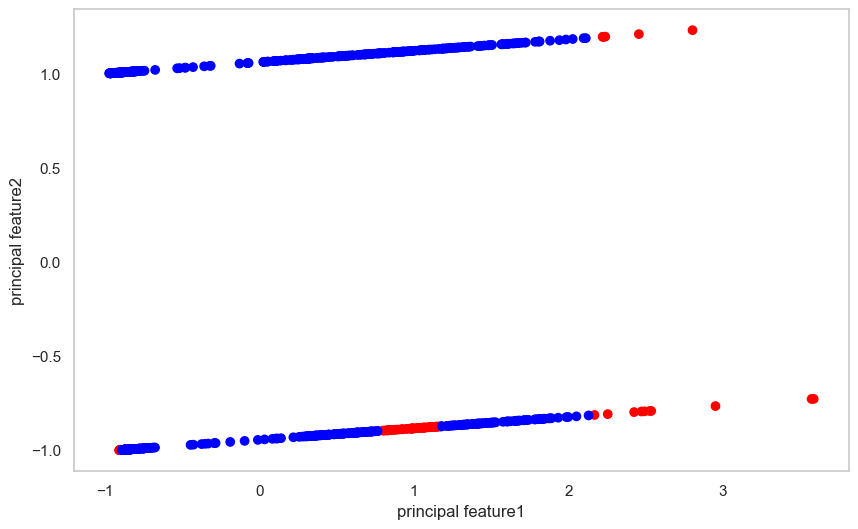

In [60]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(Gamestop['principal_feature1'], Gamestop['principal_feature2'], c=Gamestop["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show();

In [61]:
print(Gamestop.columns)



Index(['Open', 'Close', 'date_time', 'Tomorrow', 'Target', 'cluster', 'principal_feature1', 'principal_feature2', 'anomaly1'], dtype='object')


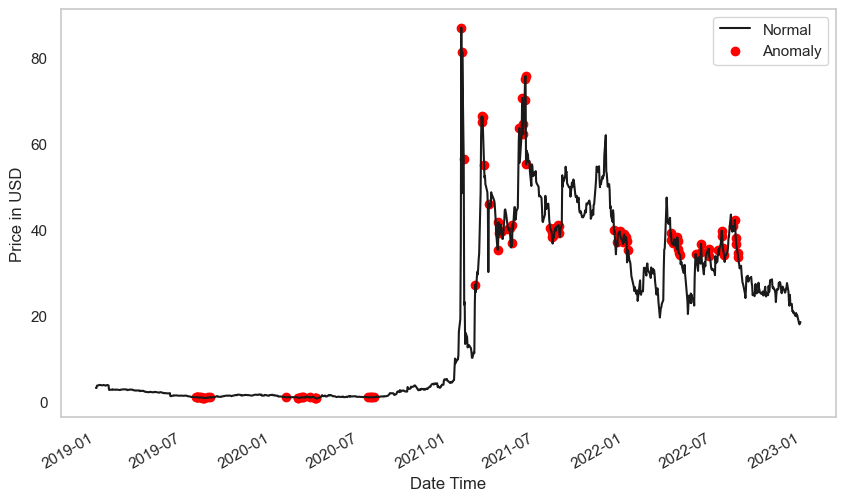

In [62]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Filter anomalies; assuming anomaly1 is a column in your DataFrame
a = Gamestop.loc[Gamestop['anomaly1'] == 1, ['date_time', 'Close']]  # Use 'Close' price or any other column

# Plot normal data using the 'date_time' column
ax.plot(Gamestop['date_time'], Gamestop['Close'], color='k', label='Normal')  # Replace 'Close' with your chosen price column

# Plot anomalies using the 'date_time' column
ax.scatter(a['date_time'], a['Close'], color='red', label='Anomaly')  # Adjust column name accordingly

# Format x-axis
ax.xaxis_date()
plt.xlabel('Date Time')
plt.ylabel('Price in USD')
plt.legend()
fig.autofmt_xdate()
plt.show()

# Neural Network Method

## LSTM Model

In [97]:
Volkswagen = yf.Ticker("VW")
Volkswagen = Volkswagen.history(start="2003-01-01", end="2008-12-31")
Herbalife = yf.Ticker("HLF")
Herbalife = Herbalife.history(start="2012-01-01", end="2019-12-31")
Tesla = yf.Ticker("TSLA")
Tesla = Tesla.history(start="2015-01-01", end="2021-12-31")
Gamestop = yf.Ticker("GME")
Gamestop = Gamestop.history(start="2016-01-01", end="2021-12-31")

# Calculate the percentage change in 'Close' column
Volkswagen['Close_pct_change'] = Volkswagen['Close'].pct_change() * 100  # Convert to percentage
Volkswagen['Close_pct_change'].fillna(0, inplace=True)

Herbalife['Close_pct_change'] = Herbalife['Close'].pct_change() * 100  # Convert to percentage
Herbalife['Close_pct_change'].fillna(0, inplace=True)

Tesla['Close_pct_change'] = Tesla['Close'].pct_change() * 100  # Convert to percentage
Tesla['Close_pct_change'].fillna(0, inplace=True)

Gamestop['Close_pct_change'] = Gamestop['Close'].pct_change() * 100  # Convert to percentage
Gamestop['Close_pct_change'].fillna(0, inplace=True)

Volkswagen['date_time'] = Volkswagen.index.to_pydatetime()
Herbalife['date_time'] = Herbalife.index.to_pydatetime()
Tesla['date_time'] = Tesla.index.to_pydatetime()
Gamestop['date_time'] = Gamestop.index.to_pydatetime()

Volkswagen.reset_index(drop=True, inplace=True)
Herbalife.reset_index(drop=True, inplace=True)
Tesla.reset_index(drop=True, inplace=True)
Gamestop.reset_index(drop=True, inplace=True)

### Model Functions

In [64]:
class LSTMModel:
    def __init__(self, df, seq_length=1):
        if 'Close_pct_change' not in df.columns:
            raise ValueError("DataFrame must contain 'Close_pct_change' column")
        
        self.data = df[['Close_pct_change']].values
        
        self.scaler = MinMaxScaler()
        self.data_scaled = self.scaler.fit_transform(self.data)
        
        # Set the sequence length and training/test split size
        self.seq_length = seq_length
        self.train_size = int(0.8 * len(self.data_scaled))
        
        self.train_data = self.data_scaled[:self.train_size]
        self.test_data = self.data_scaled[self.train_size:]

        self.X_train = self.create_sequences(self.train_data)
        self.X_test = self.create_sequences(self.test_data)
        
        # Build and summarize the model
        self.model = self.build_model()
        self.model.summary()
    
    def create_sequences(self, data):
        sequences = []
        for i in range(len(data) - self.seq_length):
            sequences.append(data[i:i+self.seq_length])
        return np.array(sequences)
    
    def build_model(self):
        model = Sequential([
            LSTM(128, input_shape=(self.seq_length, 1), return_sequences=True),
            LSTM(64, return_sequences=False),
            RepeatVector(self.seq_length),
            LSTM(64, return_sequences=True),
            LSTM(128, return_sequences=True),
            TimeDistributed(Dense(1))
        ])
        model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
        return model


In [75]:
class FitModel:
    def __init__(self, df, seq_length=1):
        self.df = df 
        self.seq_length = seq_length
        self.lstm_model = LSTMModel(df, seq_length)
    
    def fit(self, epochs=20, batch_size=7, validation_split=0.1):
        history = self.lstm_model.model.fit(
            self.lstm_model.X_train, self.lstm_model.X_train, 
            epochs=epochs, batch_size=batch_size, 
            validation_split=validation_split, shuffle=False
        )
        return history

    def detect_anomalies(self, threshold_factor=2):
        X_train_pred = self.lstm_model.model.predict(self.lstm_model.X_train)
        train_loss = np.mean(np.abs(X_train_pred - self.lstm_model.X_train), axis=(1, 2))
        
        threshold = np.mean(train_loss) + threshold_factor * np.std(train_loss)
        
        X_test_pred = self.lstm_model.model.predict(self.lstm_model.X_test)
        test_loss = np.mean(np.abs(X_test_pred - self.lstm_model.X_test), axis=(1, 2))
        
        anomalies = np.zeros(len(self.df), dtype=int)
        test_anomalies = test_loss > threshold
        test_anomaly_indices = np.where(test_anomalies)[0]
        
        anomaly_start_index = self.lstm_model.train_size + self.seq_length
        anomaly_indices = anomaly_start_index + test_anomaly_indices
        
        anomalies[anomaly_indices] = 1
        self.df['anomaly'] = anomalies 
        
        return self.df

    def display_anomalies(self):
        anomaly_df = self.df[self.df['anomaly'] == 1]
        print("Anomalies detected on the following dates:")
        for date, row in anomaly_df.iterrows():
            print(f"Date: {date}")
            print(f"Close Percentage Change: {row['Close_pct_change']:.2f}%")
            print("-" * 30)
        
        print("Total number of anomalies detected:", len(anomaly_df))

In [66]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

### Volkswagen

In [86]:
fit_model = FitModel(Volkswagen)
fit_model.fit(epochs=20, batch_size=7, validation_split=0.1)
updated_df_VW = fit_model.detect_anomalies(threshold_factor=2)  # Use the returned DataFrame
fit_model.display_anomalies()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                  │ (None, 1, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_6 (RepeatVector)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ (None, 1, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 1, 128)         │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_6              │ (None, 1, 1)           │           129 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,937 (968.50 KB)

 Trainable params: 247,937 (968.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0017 - val_loss: 4.1398e-05
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.3125e-05 - val_loss: 4.1420e-05
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.3514e-05 - val_loss: 4.1339e-05
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.4034e-05 - val_loss: 4.1468e-05
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.4748e-05 - val_loss: 4.2573e-05
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.5488e-05 - val_loss: 4.4383e-05
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.5995e-05 - val_loss: 4.6110e-05
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.6270e-05 - val_loss: 4.7474e-05
Epoch 9/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.6401e-05 - val_loss: 4.8502e-05
Epoch 10/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.6451e-05 - val_loss: 4.9275e-05
Epoch 11/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.

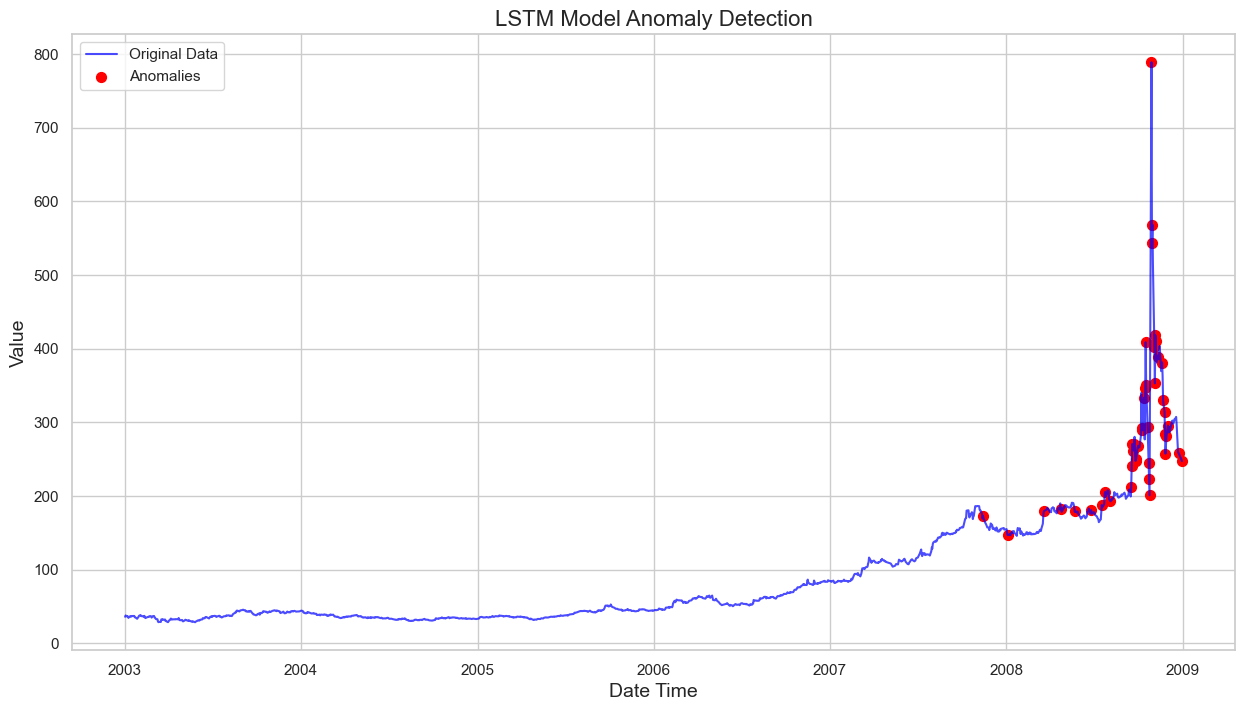

In [87]:
import matplotlib.pyplot as plt

# Separate normal and anomaly points
normal = updated_df_VW[updated_df_VW['anomaly'] == 0]
anomalies = updated_df_VW[updated_df_VW['anomaly'] == 1]

# Plot the time series
plt.figure(figsize=(15, 8))
plt.plot(Volkswagen['date_time'], Volkswagen['Close'], label='Original Data', color='blue', alpha=0.7)

# Highlight anomalies
plt.scatter(anomalies['date_time'], anomalies['Close'], color='red', label='Anomalies', s=50)

# Customize the plot
plt.title('LSTM Model Anomaly Detection', fontsize=16)
plt.xlabel('Date Time', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


In [79]:
anomalous_pct_change = Volkswagen[Volkswagen['Close_pct_change'] > 25]

print(anomalous_pct_change)

            Open        High         Low       Close  Volume  Dividends  Stock Splits  Close_pct_change                 date_time  anomaly
1320  346.023987  346.023987  346.023987  346.023987     152        0.0           0.0         25.000085 2008-10-15 00:00:00-04:00        1
1327  788.934998  788.934998  788.934998  788.934998       0        0.0           0.0        292.715989 2008-10-28 00:00:00-04:00        1


### Herbalife

In [99]:
fit_model = FitModel(Herbalife)
fit_model.fit(epochs=10, batch_size=7, validation_split=0.1)
updated_df_HLF = fit_model.detect_anomalies(threshold_factor=2) 
fit_model.display_anomalies()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_52 (LSTM)                  │ (None, 1, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_53 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_13 (RepeatVector) │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_54 (LSTM)                  │ (None, 1, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_55 (LSTM)                  │ (None, 1, 128)         │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_13             │ (None, 1, 1)           │           129 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,937 (968.50 KB)

 Trainable params: 247,937 (968.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0613 - val_loss: 8.0506e-04
Epoch 2/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0019 - val_loss: 3.1471e-05
Epoch 3/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0769e-04 - val_loss: 7.3814e-06
Epoch 4/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3975e-04 - val_loss: 4.6732e-06
Epoch 5/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.3135e-05 - val_loss: 2.3355e-06
Epoch 6/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.7068e-05 - val_loss: 1.1453e-06
Epoch 7/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.2898e-05 - val_loss: 5.7849e-07
Epoch 8/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6701e-05 - val_loss: 6.2381e-07
Epoch 9/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.4579e-06 - val_loss: 5.6111e-07
Epoch 10/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.5264e-06 - val_loss: 2.2065e-07
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 

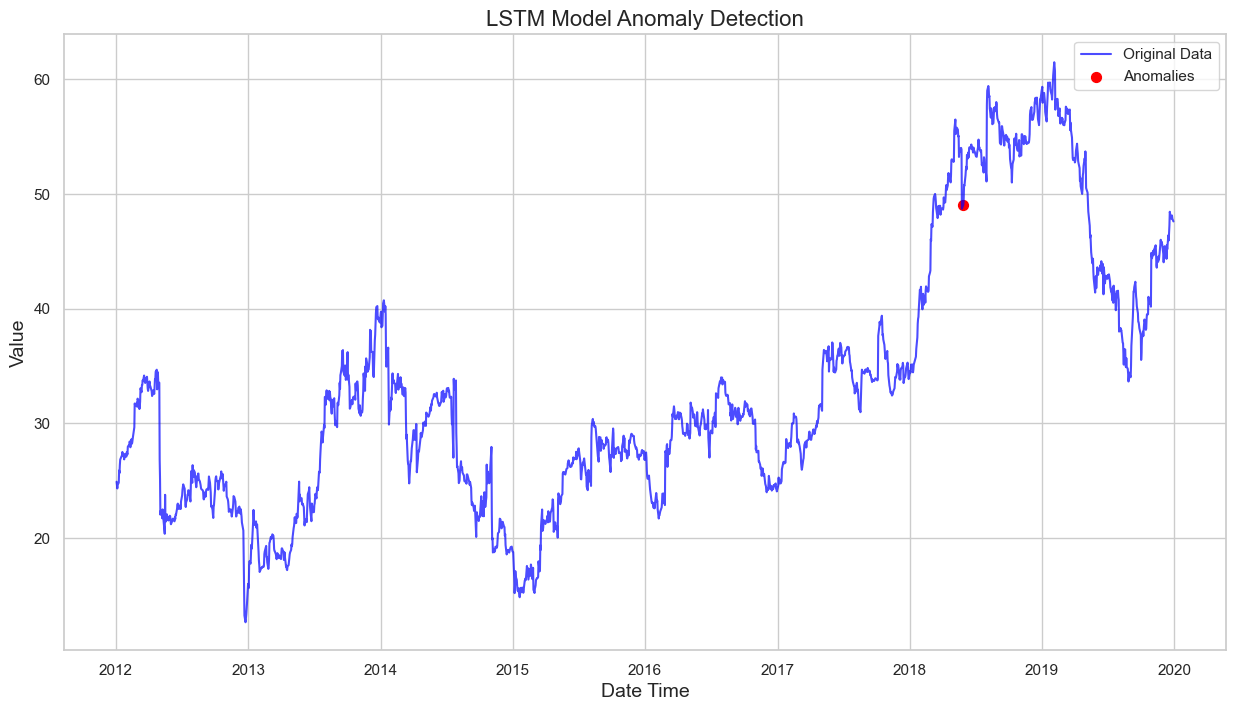

In [100]:
import matplotlib.pyplot as plt

# Separate normal and anomaly points
normal = updated_df_HLF[updated_df_HLF['anomaly'] == 0]
anomalies = updated_df_HLF[updated_df_HLF['anomaly'] == 1]

# Plot the time series
plt.figure(figsize=(15, 8))
plt.plot(Herbalife['date_time'], Herbalife['Close'], label='Original Data', color='blue', alpha=0.7)

# Highlight anomalies
plt.scatter(anomalies['date_time'], anomalies['Close'], color='red', label='Anomalies', s=50)

# Customize the plot
plt.title('LSTM Model Anomaly Detection', fontsize=16)
plt.xlabel('Date Time', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


### Tesla

In [89]:
fit_model = FitModel(Tesla)
fit_model.fit(epochs=50, batch_size=7, validation_split=0.1)
updated_df_TSLA = fit_model.detect_anomalies(threshold_factor=2)
fit_model.display_anomalies()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                  │ (None, 1, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_33 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_8 (RepeatVector)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_34 (LSTM)                  │ (None, 1, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_35 (LSTM)                  │ (None, 1, 128)         │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_8              │ (None, 1, 1)           │           129 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,937 (968.50 KB)

 Trainable params: 247,937 (968.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0884 - val_loss: 0.0114
Epoch 2/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019 - val_loss: 0.0025
Epoch 3/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.0481e-04 - val_loss: 0.0010
Epoch 4/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.1098e-05 - val_loss: 9.3796e-04
Epoch 5/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.9210e-05 - val_loss: 9.0571e-04
Epoch 6/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.9440e-05 - val_loss: 7.4810e-04
Epoch 7/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.5655e-05 - val_loss: 5.0195e-04
Epoch 8/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.7256e-05 - val_loss: 3.1587e-04
Epoch 9/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7950e-05 - val_loss: 2.1835e-04
Epoch 10/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.0729e-05 - val_loss: 1.5526e-04
Epoch 11/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7459e-05 - val_l

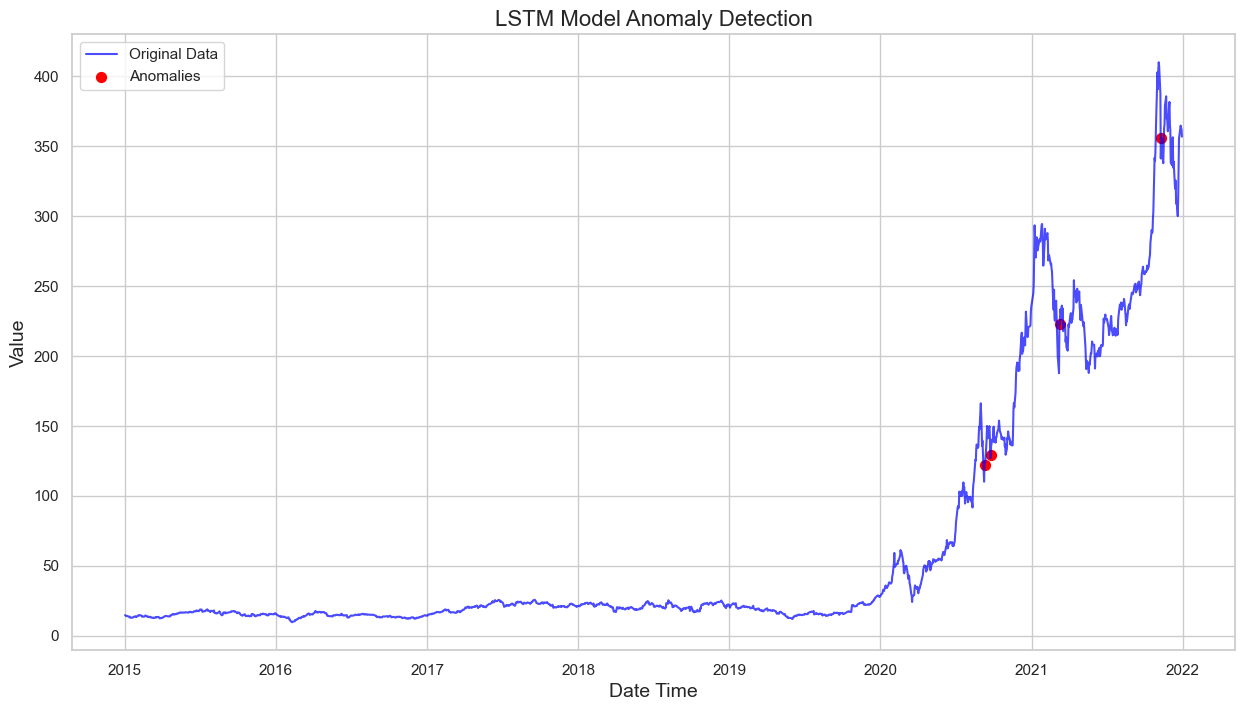

In [90]:
import matplotlib.pyplot as plt

# Separate normal and anomaly points
normal = updated_df_TSLA[updated_df_TSLA['anomaly'] == 0]
anomalies = updated_df_TSLA[updated_df_TSLA['anomaly'] == 1]

# Plot the time series
plt.figure(figsize=(15, 8))
plt.plot(Tesla['date_time'], Tesla['Close'], label='Original Data', color='blue', alpha=0.7)

# Highlight anomalies
plt.scatter(anomalies['date_time'], anomalies['Close'], color='red', label='Anomalies', s=50)

# Customize the plot
plt.title('LSTM Model Anomaly Detection', fontsize=16)
plt.xlabel('Date Time', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


As we can see here the LSTM Model performed much better on a stock with gradual volatility like Tesla. In fact our target time for Tesla mid-late 2020. We can safely assume that following our jump in March of 2020 from $30 a share and $202 a share one year later that there was heavy volatility in that time frame which our model predicted anomalies well within that range.

### Gamestop

In [91]:
fit_model = FitModel(Gamestop)
fit_model.fit(epochs=20, batch_size=7, validation_split=0.1)
updated_df_GME = fit_model.detect_anomalies(threshold_factor=2)
fit_model.display_anomalies()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                  │ (None, 1, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_37 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_9 (RepeatVector)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_38 (LSTM)                  │ (None, 1, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_39 (LSTM)                  │ (None, 1, 128)         │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_9              │ (None, 1, 1)           │           129 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,937 (968.50 KB)

 Trainable params: 247,937 (968.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.0283 - val_loss: 0.0013
Epoch 2/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3979e-04 - val_loss: 0.0013
Epoch 3/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.1616e-04 - val_loss: 0.0014
Epoch 4/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.6120e-04 - val_loss: 0.0015
Epoch 5/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.7096e-04 - val_loss: 0.0015
Epoch 6/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.5052e-04 - val_loss: 0.0014
Epoch 7/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8662e-04 - val_loss: 8.6210e-04
Epoch 8/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6752e-04 - val_loss: 3.1257e-04
Epoch 9/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.3132e-05 - val_loss: 3.7912e-06
Epoch 10/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.5800e-07 - val_loss: 2.5373e-05
Epoch 11/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.7625e-06 - val_loss: 2.

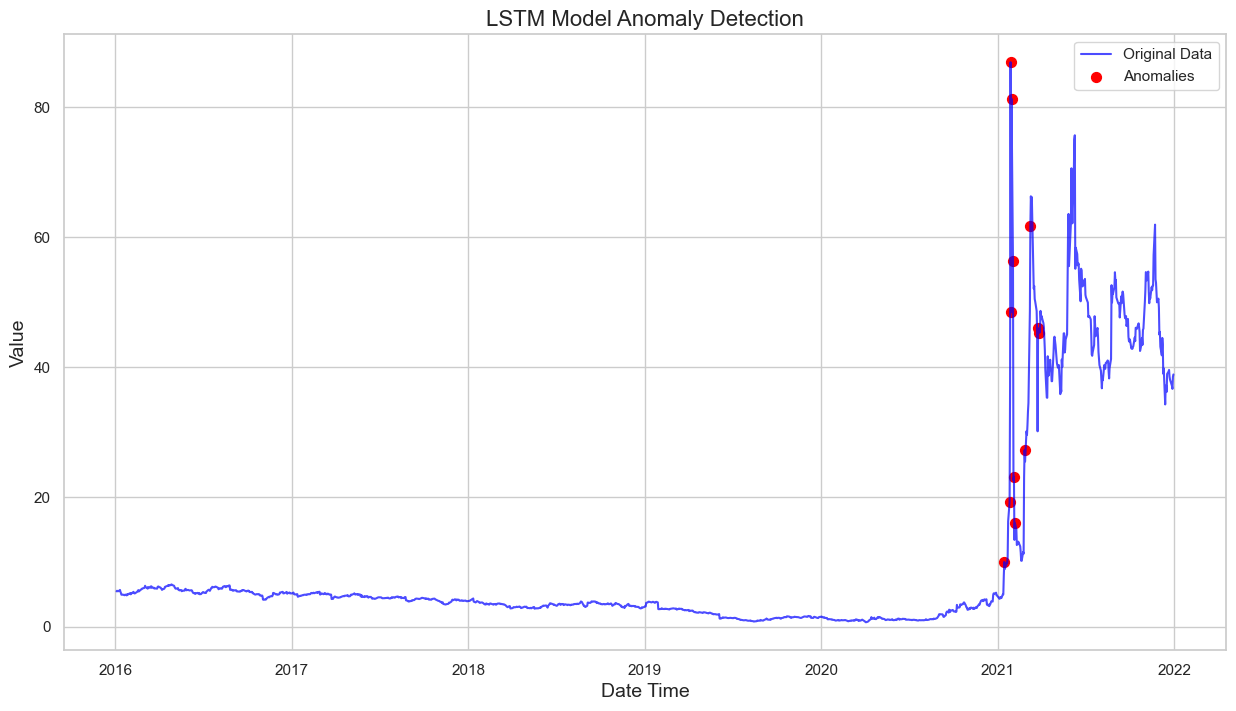

In [92]:
import matplotlib.pyplot as plt

# Separate normal and anomaly points
normal = updated_df_GME[updated_df_GME['anomaly'] == 0]
anomalies = updated_df_GME[updated_df_GME['anomaly'] == 1]

# Plot the time series
plt.figure(figsize=(15, 8))
plt.plot(Gamestop['date_time'], Gamestop['Close'], label='Original Data', color='blue', alpha=0.7)

# Highlight anomalies
plt.scatter(anomalies['date_time'], anomalies['Close'], color='red', label='Anomalies', s=50)

# Customize the plot
plt.title('LSTM Model Anomaly Detection', fontsize=16)
plt.xlabel('Date Time', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


### Key Takeaway

#### At first these LSTM models were doing a few things consistently across the various stock types. It would always predict under 10 anomalies and it would also predict the anomalies much later than they actually occurred. Through various tests of different paramters it was ultimately found that condensing the dataset closer to the Anomaly proved to be extremely fruitful. 

##### I condensed each data set to train on early stock market data leading up to the anoamly and then stopped the data much closer to the expected anaomaly. For example, out game stop dataset initially took in data from 2019 to 2023. However, when I forced the model to take in only data from 2019 until right after the anoamly (roughly end of 2021) the models not only predicted 10x the amount of anomalies but it also predicted every single day within our desired range!

##### When dataset condensing was extrapolated to the other stocks it showed the same fruitful results.

##### Further testing showed that models with an epoch number too large tended to overfit - 50 epochs produced ~40 anomalies and 20 epochs produced ~10 anomalies 

### Future Work

#### After the success of event condensing on the back side of the data set I would like to try condensing the data on the front side as well to see if LSTM models perform better with less and less data. This could also potentially reduce variance